In [44]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd

# tabelas usadas na analise
clientes_path = '/content/drive/MyDrive/python/clientes.csv'
agendamentos_path = '/content/drive/MyDrive/python/agendamentos.csv'
financeiro_path = '/content/drive/MyDrive/python/financeiro.csv'
profissionais_path = '/content/drive/MyDrive/python/profissionais.csv'

clientes = pd.read_csv(clientes_path)
agendamentos = pd.read_csv(agendamentos_path)
financeiro = pd.read_csv(financeiro_path)
profissionais = pd.read_csv(profissionais_path)


In [46]:
# juntando os dados
df = agendamentos.merge(financeiro, on='agendamento_id')
df = df.merge(clientes, on='cliente_id')
df = df.merge(profissionais, on='profissional')


In [47]:
# o objetivo dessa parte é entender serviço que vende muito e serviço que lucra pouco
df_ok = df[df['status'] == 'Compareceu']

In [48]:
df_ok['lucro'] = df_ok['valor_cobrado'] - df_ok['custo_servico']


/tmp/ipython-input-736533460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ok['lucro'] = df_ok['valor_cobrado'] - df_ok['custo_servico']


In [49]:
faturamento_total = df_ok['valor_cobrado'].sum()


In [50]:
lucro_total = df_ok['lucro'].sum()



In [51]:
ticket_medio = faturamento_total / df_ok['cliente_id'].nunique()


In [52]:
df_ok.groupby('servico')[['valor_cobrado','lucro']].sum()

,valor_cobrado,lucro
servico,,
Botox,36000,25500
Limpeza de Pele,5400,3600
Preenchimento,45000,30000


In [53]:
taxa_faltas = (
    agendamentos['status'].value_counts(normalize=True) * 100
)

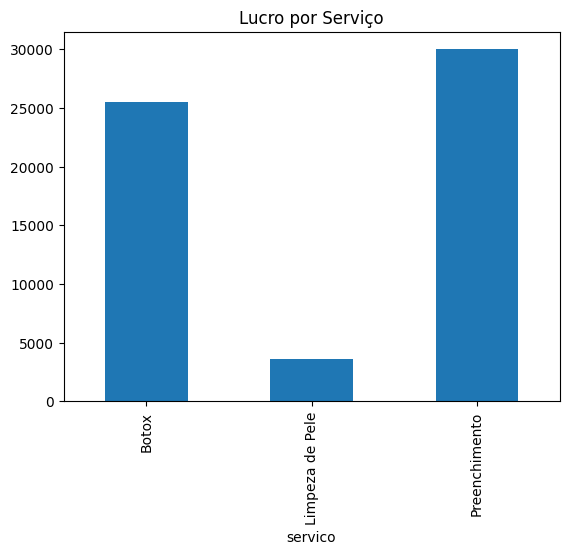

In [54]:
import matplotlib.pyplot as plt

lucro_servico = df_ok.groupby('servico')['lucro'].sum()
lucro_servico.plot(kind='bar')
plt.title('Lucro por Serviço')
plt.show()


In [55]:
# O serviço de Preenchimento apresenta alto lucro absoluto, indicando maior contribuição financeira. Já a Limpeza de Pele possui grande volume, porém menor margem

In [56]:
import seaborn as sns

In [58]:
agendamentos['data'] = pd.to_datetime(agendamentos['data'])

KeyError: 'data'